In [1]:
import pandas as pd
import numpy as np
import datetime, random, json, time
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import seaborn as sns

from brownie import web3, network, Wei, Contract, project
from brownie.network.account import LocalAccount

sns.set(style='darkgrid', context='talk', palette='Dark2')
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['figure.dpi'] = 200

%store -r all_pcTransfer_logs
%store -r pcTransfer_logs

In [2]:
network_selected = "ropsten"
network.connect(network_selected)

# Loading the metamask accounts
## Trading account
fss_trading_private_key = "faba88e53b6fac655f7e0b5cb900e0bc045e787eb850fdf17f458f0fb8607bde"
fss_trading_account = web3.eth.account.from_key(private_key=fss_trading_private_key)
local_account_trading = LocalAccount(fss_trading_account.address, fss_trading_account, fss_trading_account.privateKey)
## Admin account
fss_admin_private_key = "ede4dd8a3584fd7809a5e0bb299ff8f51983af5b1a9f1f506165b5c1f09e22b1"
fss_admin_account = web3.eth.account.from_key(private_key=fss_admin_private_key)
local_account_admin = LocalAccount(fss_admin_account.address, fss_admin_account, fss_admin_account.privateKey)

In [3]:
with open('../../blockchain_course_unimi/challenge/teamCST/abi/PayCoin.json') as json_file: 
    payCoin_abi = json.load(json_file)
payCoin = Contract.from_abi('PayCoin', address='0xa501cA3B72d8D90235BD8ADb2c67aCc062F451FA', abi=payCoin_abi)
web3_payCoin = web3.eth.contract(abi=payCoin_abi, address='0xa501cA3B72d8D90235BD8ADb2c67aCc062F451FA')
                                 
with open('../../blockchain_course_unimi/challenge/teamCST/abi/ERC20Challenge.json') as json_file: 
    token_CST_abi = json.load(json_file)
token_CST = Contract.from_abi('TokenCST', address='0x247aC570E31C7B07829Ddc4B284AB5Bb55BEC825', abi=token_CST_abi)
web3_token_CST = web3.eth.contract(abi=token_CST_abi, address='0x247aC570E31C7B07829Ddc4B284AB5Bb55BEC825')

with open('../../blockchain_course_unimi/challenge/teamAA/abi/real/token.json') as json_file: 
    token_AA_abi = json.load(json_file)
token_AA = Contract.from_abi('TokenAA', address='0x5F61E047C53b398CA6aCcD964B117FF4b520535C', abi=token_AA_abi)
web3_token_AA = web3.eth.contract(abi=token_AA_abi, address='0x5F61E047C53b398CA6aCcD964B117FF4b520535C')

with open('../pyscripts/abi/token_erc20.json') as json_file: 
    token_FSS_abi = json.load(json_file)
token_FSS = Contract.from_abi('TokenFSS', address='0xFBDE8b1b7F1F513a1a61b63f285348Da22CbfF2f', abi=token_FSS_abi)
web3_token_FSS = web3.eth.contract(abi=token_FSS_abi, address='0xFBDE8b1b7F1F513a1a61b63f285348Da22CbfF2f')

In [4]:
#transfer_erc20 = web3.keccak(text='Transfer(address,address,uint256)').hex()

In [5]:
#all_pcTransfer_logs = web3.eth.getLogs({'fromBlock': 0, 'toBlock': 'latest', 'address': payCoin.address, 'topics': [transfer_erc20]})

In [6]:
#pcTransfer_logs = [] 
#for event_data in all_pcTransfer_logs: 
#        tx_hash = event_data['transactionHash'].hex()
#        receipt = web3.eth.getTransactionReceipt(tx_hash)
#        pcTransfer_logs.append(web3_payCoin.events.Transfer().processReceipt(receipt))

In [7]:
pcTransfer_AA = []
rep = 0
for i in range(0, len(pcTransfer_logs)):
    for j in range(0, len(pcTransfer_logs[i])):
        if(pcTransfer_logs[i][j]['args']['from'] == '0xe5e619C1cE24A3c5083D6c30FAD80Dbe4D8FFd39' or pcTransfer_logs[i][j]['args']['to'] == '0xe5e619C1cE24A3c5083D6c30FAD80Dbe4D8FFd39'):
            appo = pcTransfer_logs[i][j]
            for c in range(0, len(pcTransfer_AA)): 
                if(appo == pcTransfer_AA[c]): 
                    rep += 1
            if(rep == 0): 
                pcTransfer_AA.append(appo)
            else: 
                print(rep, 'Element already in list!')
        rep = 0

1 Element already in list!
1 Element already in list!
1 Element already in list!
1 Element already in list!
1 Element already in list!
1 Element already in list!
1 Element already in list!
1 Element already in list!
1 Element already in list!
1 Element already in list!
1 Element already in list!
1 Element already in list!
1 Element already in list!
1 Element already in list!
1 Element already in list!
1 Element already in list!
1 Element already in list!
1 Element already in list!
1 Element already in list!
1 Element already in list!
1 Element already in list!
1 Element already in list!
1 Element already in list!
1 Element already in list!
1 Element already in list!
1 Element already in list!
1 Element already in list!
1 Element already in list!
1 Element already in list!
1 Element already in list!
1 Element already in list!
1 Element already in list!
1 Element already in list!
1 Element already in list!
1 Element already in list!
1 Element already in list!
1 Element already in list!
1

In [8]:
len(pcTransfer_AA)

161

In [9]:
pcAA_wallet = []
dates_pcTranfer_AA = []
for i in range(0, len(pcTransfer_AA)): 
    blkNumber = pcTransfer_AA[i]['blockNumber']
    timestamp = web3.eth.getBlock(blkNumber)['timestamp']
    date = datetime.datetime.fromtimestamp(timestamp)
    dates_pcTranfer_AA.append(date)
    if(pcTransfer_AA[i]['args']['to'] == '0xe5e619C1cE24A3c5083D6c30FAD80Dbe4D8FFd39'): 
        pcAA_wallet.append( pcTransfer_AA[i]['args']['value'] )
    if(pcTransfer_AA[i]['args']['from'] == '0xe5e619C1cE24A3c5083D6c30FAD80Dbe4D8FFd39'): 
        pcAA_wallet.append(-pcTransfer_AA[i]['args']['value'] )

In [10]:
pcAA_wallet = np.array(pcAA_wallet)
pcAA_wallet = pcAA_wallet.cumsum()
pcAA_wallet = list(pcAA_wallet)
pcAA_wallet

[50000000000000000000000,
 49900000000000000000000,
 50900000000000000000000,
 50800000000000000000000,
 51800000000000000000000,
 51750000000000000000000,
 52750000000000000000000,
 52650000000000000000000,
 53650000000000000000000,
 53600000000000000000000,
 53550000000000000000000,
 54550000000000000000000,
 54500000000000000000000,
 55500000000000000000000,
 55400000000000000000000,
 56400000000000000000000,
 56300000000000000000000,
 57300000000000000000000,
 57200000000000000000000,
 58200000000000000000000,
 58100000000000000000000,
 59100000000000000000000,
 59000000000000000000000,
 60000000000000000000000,
 59900000000000000000000,
 60900000000000000000000,
 60800000000000000000000,
 61800000000000000000000,
 61750000000000000000000,
 62750000000000000000000,
 62650000000000000000000,
 63650000000000000000000,
 63600000000000000000000,
 64600000000000000000000,
 64599999999999999999999,
 64600000000000000000000,
 64599999999999999999999,
 64600000000000000000000,
 64500000000

In [11]:
dates_pcTranfer_AA

[datetime.datetime(2020, 6, 23, 12, 22, 32),
 datetime.datetime(2020, 6, 24, 19, 26, 30),
 datetime.datetime(2020, 6, 24, 19, 26, 30),
 datetime.datetime(2020, 6, 25, 4, 46, 13),
 datetime.datetime(2020, 6, 25, 4, 46, 13),
 datetime.datetime(2020, 6, 25, 11, 33, 4),
 datetime.datetime(2020, 6, 25, 11, 33, 4),
 datetime.datetime(2020, 6, 25, 12, 7, 8),
 datetime.datetime(2020, 6, 25, 12, 7, 8),
 datetime.datetime(2020, 6, 25, 12, 29, 21),
 datetime.datetime(2020, 6, 25, 15, 18, 59),
 datetime.datetime(2020, 6, 25, 15, 18, 59),
 datetime.datetime(2020, 6, 25, 15, 26, 22),
 datetime.datetime(2020, 6, 25, 15, 26, 22),
 datetime.datetime(2020, 6, 25, 16, 4, 12),
 datetime.datetime(2020, 6, 25, 16, 4, 12),
 datetime.datetime(2020, 6, 25, 20, 29, 35),
 datetime.datetime(2020, 6, 25, 20, 29, 35),
 datetime.datetime(2020, 6, 25, 22, 7, 58),
 datetime.datetime(2020, 6, 25, 22, 7, 58),
 datetime.datetime(2020, 6, 26, 0, 11, 7),
 datetime.datetime(2020, 6, 26, 0, 11, 7),
 datetime.datetime(2020, 6

In [12]:
df_pcAA_wallet = pd.DataFrame(pcAA_wallet, index = dates_pcTranfer_AA, columns = ['PayCoin'])
df_pcAA_wallet

,PayCoin
2020-06-23 12:22:32,50000000000000000000000
2020-06-24 19:26:30,49900000000000000000000
2020-06-24 19:26:30,50900000000000000000000
2020-06-25 04:46:13,50800000000000000000000
2020-06-25 04:46:13,51800000000000000000000
...,...
2020-06-30 14:06:34,113199999999999999995708
2020-06-30 17:12:40,113149999999999999995708
2020-06-30 17:12:40,114149999999999999995708
2020-06-30 17:17:43,114149999999999999995707


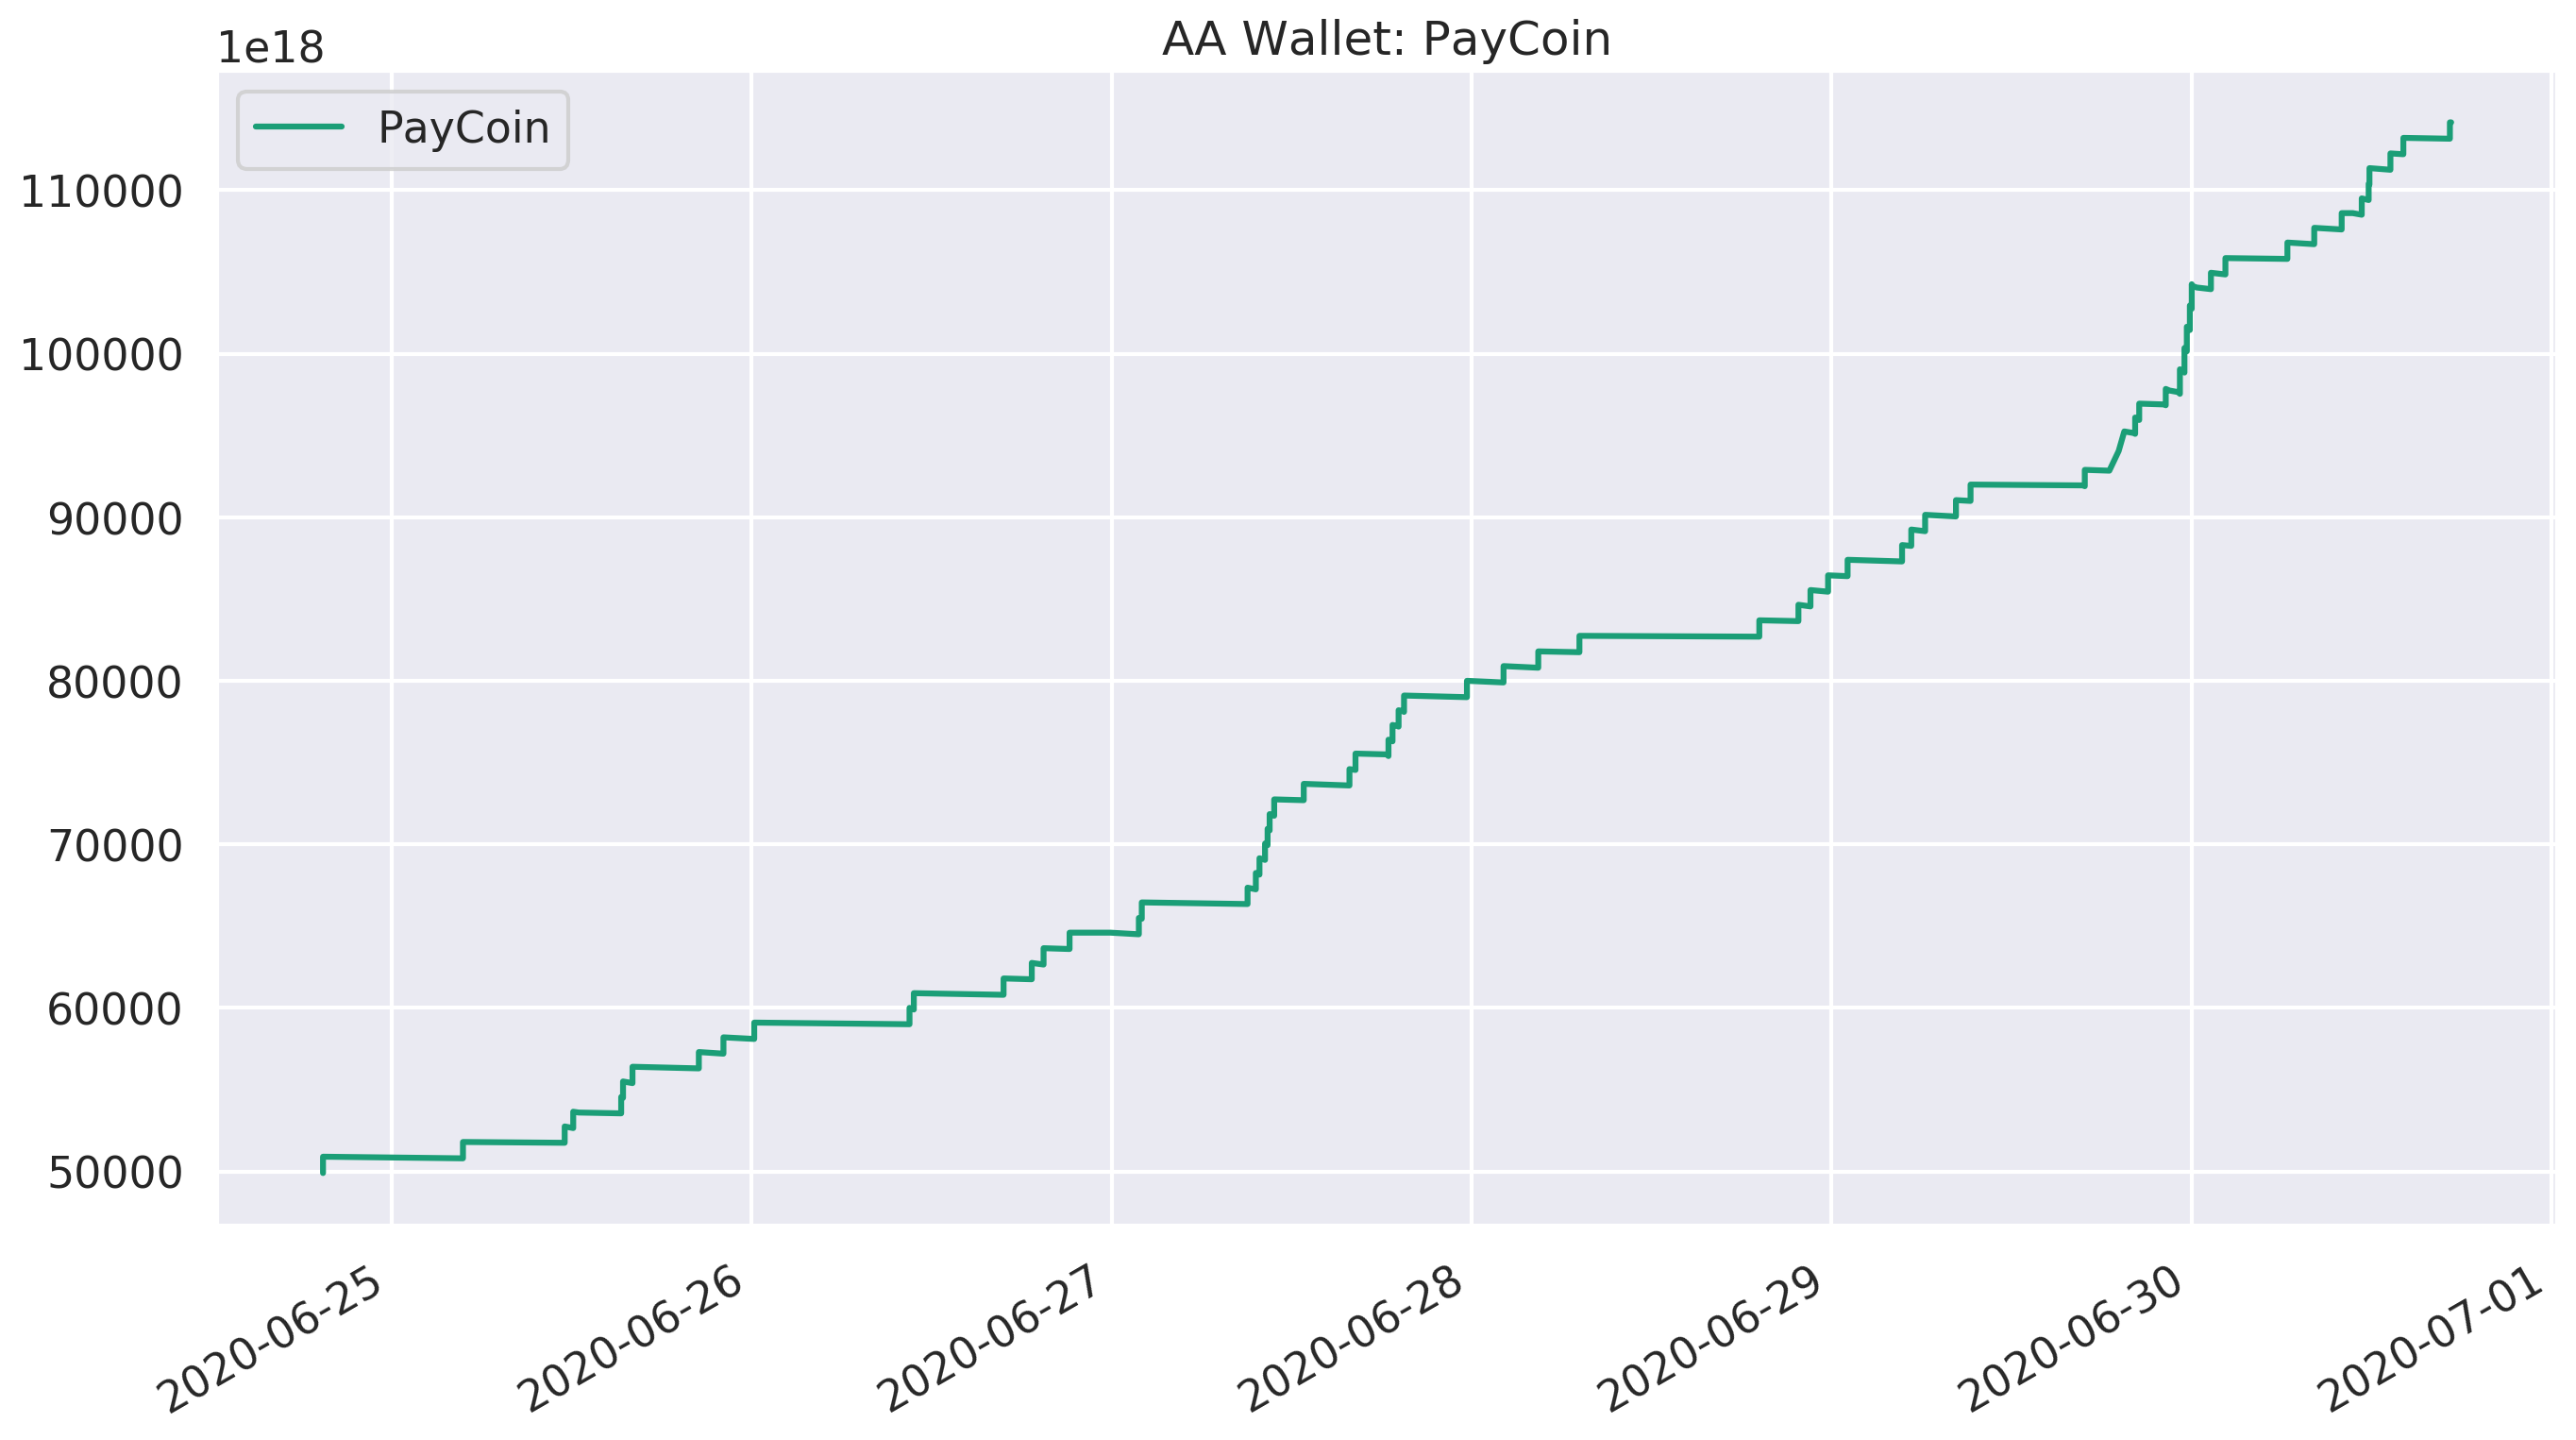

In [13]:
start_date = '2020-06-24 09:00:00'
end_date = '2020-06-30 18:00:00'

fig, ax = plt.subplots(figsize=(16,9))

ax.plot(df_pcAA_wallet.loc[start_date:end_date, :].index, df_pcAA_wallet.loc[start_date:end_date, 'PayCoin'], label='PayCoin')
#ax.plot(FSS_portfolio.loc[start_date:end_date, :].index, FSS_portfolio.loc[start_date:end_date, 'TokenCST'], label = 'TokenCST')
#ax.plot(FSS_portfolio.loc[start_date:end_date, :].index, FSS_portfolio.loc[start_date:end_date, 'TokenAA'], label = 'TokenAA')
#ax.plot(FSS_portfolio.loc[start_date:end_date, :].index, FSS_portfolio.loc[start_date:end_date, 'Total Value'], label = 'Total Value')

ax.legend(loc='best')
ax.set_title('AA Wallet: PayCoin')
#ax.set_ylabel('Price in PaC')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.ticklabel_format( axis='y', style='sci', scilimits=(18,18), useOffset=None, useLocale=None, useMathText=None)
#ax.xaxis.set_major_locator(mdates.DayLocator())
fig.autofmt_xdate()

In [14]:
with open('../pyscripts/abi/token_exchange.json') as json_file: 
    exchange_FSS_abi = json.load(json_file)
exchange_FSS = Contract.from_abi('ExchangeFSS', address="0x99d07b3fA4C2046a43e3911AC5a5bC3B0115b110", abi= exchange_FSS_abi)
web3_exchange_FSS = web3.eth.contract(abi=exchange_FSS_abi, address='0x99d07b3fA4C2046a43e3911AC5a5bC3B0115b110')

In [15]:
buy_sign = web3.keccak(text="Buy(address,uint256,uint256)").hex()
sell_sign = web3.keccak(text="Sell(address,uint256,uint256)").hex()

In [16]:
all_buys_FSS = web3.eth.getLogs({'fromBlock': 0, 'toBlock': 'latest', 'address': exchange_FSS.address, 'topics': [buy_sign]})
all_sell_FSS = web3.eth.getLogs({'fromBlock': 0, 'toBlock': 'latest', 'address': exchange_FSS.address, 'topics': [sell_sign]})

In [17]:
buy_FSS_logs = [] 
for event_data in all_buys_FSS: 
        #print(event_data)
        tx_hash = event_data['transactionHash'].hex()
        receipt = web3.eth.getTransactionReceipt(tx_hash)
        #events = ['Buy', 'Sell']
        buy_FSS_logs.append(web3_exchange_FSS.events.Buy().processReceipt(receipt))

/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'\xfa\x88\xabq7\xc1\xbe\xe8\xa6\x19\x83\x16\x99\xe0H\xbeD\xb6M\xe8\xbf-\x9d\x84\x0br\xb6]\x0c\xe4:{' and logIndex: 26 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'\xfa\x88\xabq7\xc1\xbe\xe8\xa6\x19\x83\x16\x99\xe0H\xbeD\xb6M\xe8\xbf-\x9d\x84\x0br\xb6]\x0c\xe4:{' and logIndex: 27 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/p

/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'\xf6n\x00z*w\x9b\x90\xab\x1d\x7f\x8d\xd4\x80\xa0\xd7\xa8\xef\x9fx\xcd\xcd\xd11brbL$\xd8sy' and logIndex: 0 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'\xf6n\x00z*w\x9b\x90\xab\x1d\x7f\x8d\xd4\x80\xa0\xd7\xa8\xef\x9fx\xcd\xcd\xd11brbL$\xd8sy' and logIndex: 1 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packag

/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'\xba\xdac\xb53u\xc2\x92Y\x90\xa5\x10\xcbJ\xc2\xa6\xc0\xa1\xb1\xc2Ra\x10 y\xae*8\x1d\x06\x10\x19' and logIndex: 3 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'\xba\xdac\xb53u\xc2\x92Y\x90\xa5\x10\xcbJ\xc2\xa6\xc0\xa1\xb1\xc2Ra\x10 y\xae*8\x1d\x06\x10\x19' and logIndex: 4 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7

In [18]:
AA_buy_FSS = []
for i in range(0, len(buy_FSS_logs)): 
    for j in range(0, len(buy_FSS_logs[i])):
        if(buy_FSS_logs[i][j]['args']['buyer'] == '0xe5e619C1cE24A3c5083D6c30FAD80Dbe4D8FFd39'): 
            appo = buy_FSS_logs[i][j]
            for c in range(0, len(AA_buy_FSS)): 
                if(appo == AA_buy_FSS[c]): 
                    rep += 1
            if(rep == 0): 
                AA_buy_FSS.append(appo)
            else: 
                print(rep, 'Element already in list!')
        rep = 0

In [19]:
AA_buy_FSS

[AttributeDict({'args': AttributeDict({'buyer': '0xe5e619C1cE24A3c5083D6c30FAD80Dbe4D8FFd39',
   'amount': 1,
   'price': 4293900000000000089100}),
  'event': 'Buy',
  'logIndex': 15,
  'transactionIndex': 14,
  'transactionHash': HexBytes('0x9a3aae5c4e7c73b051d17557a95577cd56c86799906c0f8181b1035a98b2acb0'),
  'address': '0x99d07b3fA4C2046a43e3911AC5a5bC3B0115b110',
  'blockHash': HexBytes('0xf676aaabba8111b20f445297b15a17a4df88e1595b3122e31bfc538970ad70e8'),
  'blockNumber': 8198677})]

In [21]:
tkFSS_Mint_AA_wallet = []
dates_tkFSS_Mint_AA = []
for i in range(0, len(AA_buy_FSS)): 
    blkNumber = AA_buy_FSS[i]['blockNumber']
    timestamp = web3.eth.getBlock(blkNumber)['timestamp']
    date = datetime.datetime.fromtimestamp(timestamp)
    dates_tkFSS_Mint_AA.append(date)
    if(AA_buy_FSS[i]['args']['buyer'] == '0xe5e619C1cE24A3c5083D6c30FAD80Dbe4D8FFd39'): 
        tkFSS_Mint_AA_wallet.append(AA_buy_FSS[i]['args']['amount'] )   

In [22]:
sell_FSS_logs = [] 
for event_data in all_sell_FSS: 
        #print(event_data)
        tx_hash = event_data['transactionHash'].hex()
        receipt = web3.eth.getTransactionReceipt(tx_hash)
        #events = ['Buy', 'Sell']
        sell_FSS_logs.append(web3_exchange_FSS.events.Sell().processReceipt(receipt))

/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'\xd7\x17\xf0(\xa2\xf1 \x93\x84\t\xd2a\x06\xc4\x93\x16\xdd\xbbS~\xa3\x8f\xb4\xe0\x9b\\\xbf\xfc\x1b\x0fi\x1c' and logIndex: 3 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'\xd7\x17\xf0(\xa2\xf1 \x93\x84\t\xd2a\x06\xc4\x93\x16\xdd\xbbS~\xa3\x8f\xb4\xe0\x9b\\\xbf\xfc\x1b\x0fi\x1c' and logIndex: 4 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/bl

/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'\xfe\xbaI\xde\x00\x9f7O\rL\xf70\xd0\xb4\xb4\xe3\x1d\x15v\x9et\xcf[,\xcd\xf0\xa6\x18fF94' and logIndex: 5 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'\xfe\xbaI\xde\x00\x9f7O\rL\xf70\xd0\xb4\xb4\xe3\x1d\x15v\x9et\xcf[,\xcd\xf0\xa6\x18fF94' and logIndex: 6 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/w

In [23]:
AA_sell_FSS = []
for i in range(0, len(sell_FSS_logs)): 
    for j in range(0, len(sell_FSS_logs[i])):
        if(sell_FSS_logs[i][j]['args']['buyer'] == '0xe5e619C1cE24A3c5083D6c30FAD80Dbe4D8FFd39'): 
            appo = sell_FSS_logs[i][j]
            for c in range(0, len(AA_sell_FSS)): 
                if(appo == AA_sell_FSS[c]): 
                    rep += 1
            if(rep == 0): 
                AA_sell_FSS.append(appo)
            else: 
                print(rep, 'Element already in list!')
        rep = 0

In [24]:
tkFSS_Burn_AA_wallet = []
dates_tkFSS_Burn_AA = []
for i in range(0, len(AA_sell_FSS)): 
    blkNumber = AA_sell_FSS[i]['blockNumber']
    timestamp = web3.eth.getBlock(blkNumber)['timestamp']
    date = datetime.datetime.fromtimestamp(timestamp)
    dates_tkFSS_Burn_AA.append(date)
    if(AA_sell_FSS[i]['args']['buyer'] == '0xe5e619C1cE24A3c5083D6c30FAD80Dbe4D8FFd39'): 
        tkFSS_Burn_AA_wallet.append(-AA_sell_FSS[i]['args']['amount'] ) 

In [27]:
df_tkFSS_Mint_AA_wallet = pd.DataFrame(tkFSS_Mint_AA_wallet, index = dates_tkFSS_Mint_AA, columns = ['TokenFSS'])
df_tkFSS_Burn_AA_wallet = pd.DataFrame(tkFSS_Burn_AA_wallet, index = dates_tkFSS_Burn_AA, columns = ['TokenFSS'])
df_tkFSS_AA_wallet = pd.concat([df_tkFSS_Mint_AA_wallet, df_tkFSS_Burn_AA_wallet])
df_tkFSS_AA_wallet.sort_index(inplace=True)
df_tkFSS_AA_wallet = df_tkFSS_AA_wallet.cumsum()
df_tkFSS_AA_wallet

,TokenFSS
2020-06-30 10:44:03,1


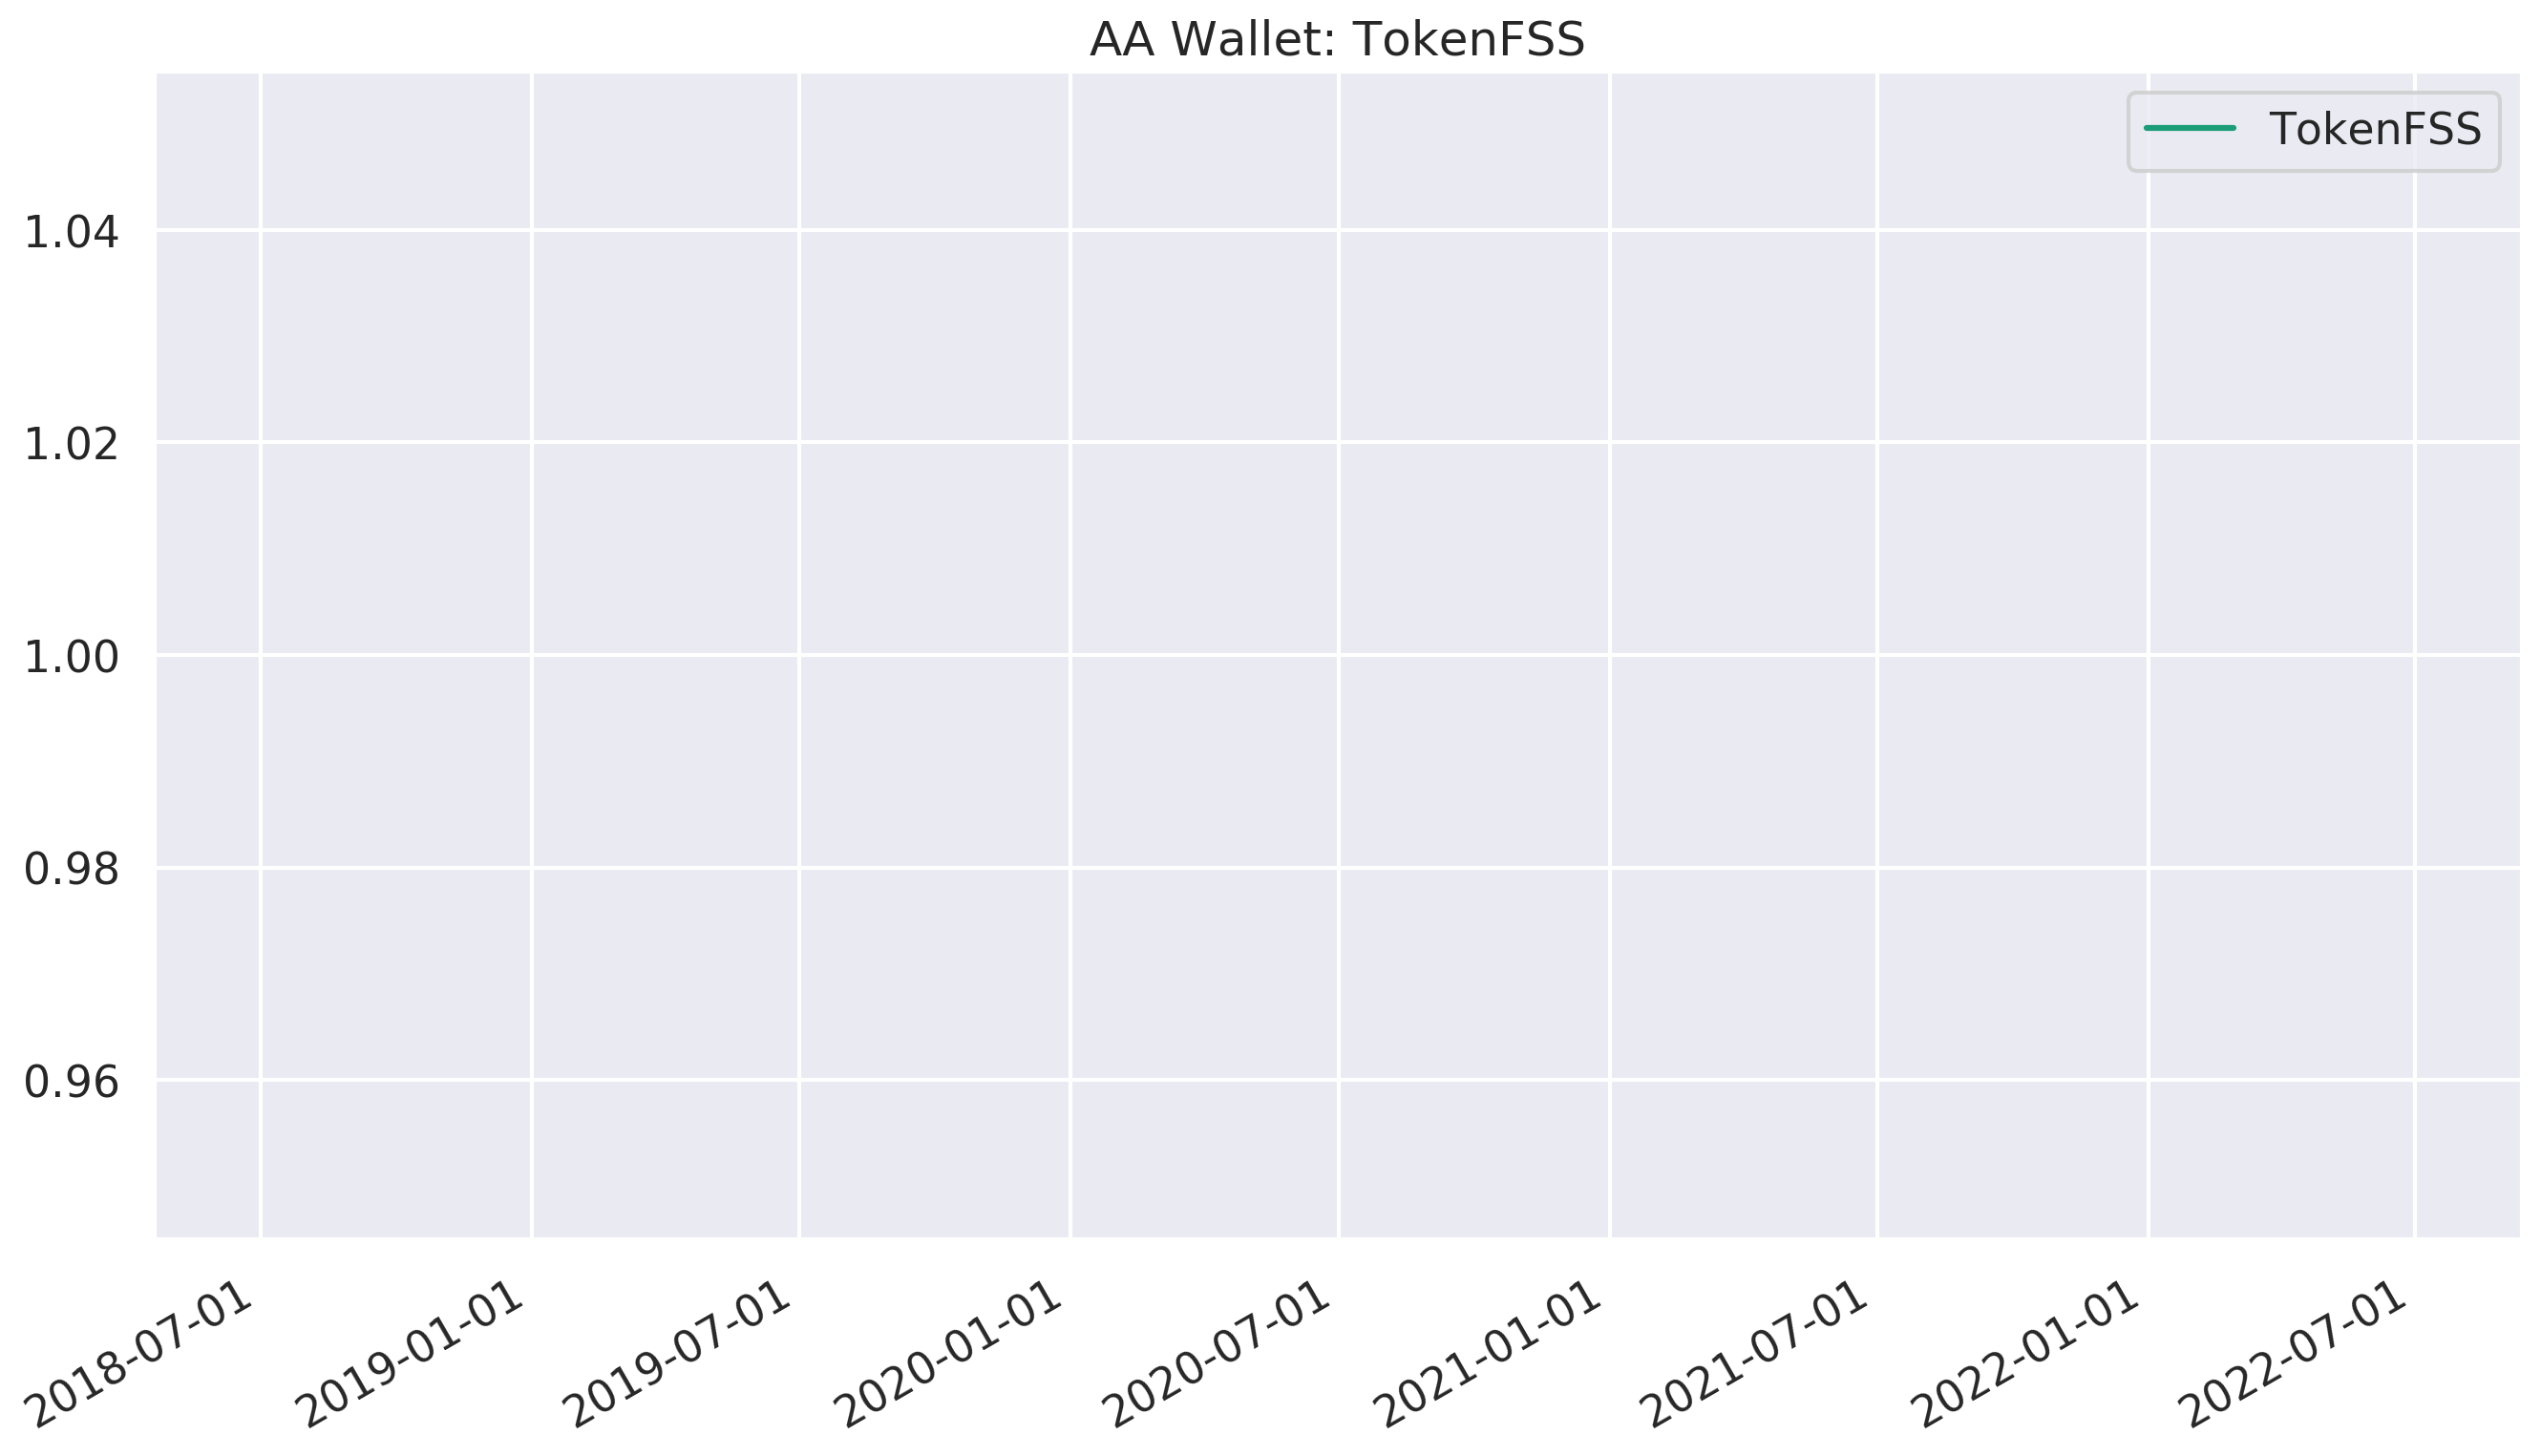

In [29]:
start_date = '2020-06-24 09:00:00'
end_date = '2020-06-30 18:00:00'

fig, ax = plt.subplots(figsize=(16,9))

ax.plot(df_tkFSS_AA_wallet.loc[start_date:end_date, :].index, df_tkFSS_AA_wallet.loc[start_date:end_date, 'TokenFSS'], label='TokenFSS')
#ax.plot(FSS_portfolio.loc[start_date:end_date, :].index, FSS_portfolio.loc[start_date:end_date, 'TokenCST'], label = 'TokenCST')
#ax.plot(FSS_portfolio.loc[start_date:end_date, :].index, FSS_portfolio.loc[start_date:end_date, 'TokenAA'], label = 'TokenAA')
#ax.plot(FSS_portfolio.loc[start_date:end_date, :].index, FSS_portfolio.loc[start_date:end_date, 'Total Value'], label = 'Total Value')

ax.legend(loc='best')
ax.set_title('AA Wallet: TokenFSS')
#ax.set_ylabel('Price in PaC')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
#ax.ticklabel_format( axis='y', style='sci', scilimits=(18,18), useOffset=None, useLocale=None, useMathText=None)
#ax.xaxis.set_major_locator(mdates.DayLocator())
fig.autofmt_xdate()

In [30]:
with open('../../blockchain_course_unimi/challenge/teamCST/abi/Exchange.json') as json_file: 
    exchange_CST_abi = json.load(json_file)
exchange_CST = Contract.from_abi('ExchangeCST', address='0xf6595CF80173Edf534469B15170370AbFF3FDdAb', abi=exchange_CST_abi)
web3_exchange_CST = web3.eth.contract(abi=exchange_CST_abi, address='0xf6595CF80173Edf534469B15170370AbFF3FDdAb')

In [31]:
all_buys_CST = web3.eth.getLogs({'fromBlock': 0, 'toBlock': 'latest', 'address': exchange_CST.address, 'topics': [buy_sign]})
all_sell_CST = web3.eth.getLogs({'fromBlock': 0, 'toBlock': 'latest', 'address': exchange_CST.address, 'topics': [sell_sign]})

In [32]:
buy_CST_logs = [] 
for event_data in all_buys_CST: 
        #print(event_data)
        tx_hash = event_data['transactionHash'].hex()
        receipt = web3.eth.getTransactionReceipt(tx_hash)
        #events = ['Buy', 'Sell']
        buy_CST_logs.append(web3_exchange_CST.events.Buy().processReceipt(receipt))

/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b"\xd6\xc4\xc8\xce\xa6\x9f@!/y`\xc1\xc1\xe8'\xad?\xec\xa8~\xbeH\xae\xd7\xdd_cs\xb8\xa0\xb8e" and logIndex: 1 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b"\xd6\xc4\xc8\xce\xa6\x9f@!/y`\xc1\xc1\xe8'\xad?\xec\xa8~\xbeH\xae\xd7\xdd_cs\xb8\xa0\xb8e" and logIndex: 2 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packag

/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'\xe5\x1e/\x1e\x16j^\x9dEy-\xf1V\xe0\x85\xe2\xff^\xa0V\x1d%\x131;\xe3\xd7W\x8b\x89,\x80' and logIndex: 1 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'\xe5\x1e/\x1e\x16j^\x9dEy-\xf1V\xe0\x85\xe2\xff^\xa0V\x1d%\x131;\xe3\xd7W\x8b\x89,\x80' and logIndex: 2 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web

/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'ZI\xa51gd\x91\xfd\xc6H\xef\xeb\x851hy\x99\xf6\xf3\x01\x91\xa2\xd1\x05\xfe\x19H\xdf(\xe6\x08\xc5' and logIndex: 2 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'ZI\xa51gd\x91\xfd\xc6H\xef\xeb\x851hy\x99\xf6\xf3\x01\x91\xa2\xd1\x05\xfe\x19H\xdf(\xe6\x08\xc5' and logIndex: 3 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7

/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'\xcf\x1aIbE\xb9~\x99J=\xd5V\x123=\xf8a\x06?\xd6\xacFr\x7f\xbb\xcdA\x905\x1e/\xb4' and logIndex: 51 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'\xcf\x1aIbE\xb9~\x99J=\xd5V\x123=\xf8a\x06?\xd6\xacFr\x7f\xbb\xcdA\x905\x1e/\xb4' and logIndex: 52 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract

/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'yY\xe3Y\xa2\x04\x92\xfe\xa8\x0f\x94\xfe1?$\x1d5?\xd5\x1f\xe3\x16\xde\xf8^R\x1f\x8d-\x05\xbe\xfa' and logIndex: 5 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'yY\xe3Y\xa2\x04\x92\xfe\xa8\x0f\x94\xfe1?$\x1d5?\xd5\x1f\xe3\x16\xde\xf8^R\x1f\x8d-\x05\xbe\xfa' and logIndex: 6 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7

In [33]:
AA_buy_CST = []
for i in range(0, len(buy_CST_logs)): 
    for j in range(0, len(buy_CST_logs[i])):
        if(buy_CST_logs[i][j]['args']['buyer'] == '0xe5e619C1cE24A3c5083D6c30FAD80Dbe4D8FFd39'): 
            appo = buy_CST_logs[i][j]
            for c in range(0, len(AA_buy_CST)): 
                if(appo == AA_buy_CST[c]): 
                    rep += 1
            if(rep == 0): 
                AA_buy_CST.append(appo)
            else: 
                print(rep, 'Element already in list!')
        rep = 0

In [35]:
tkCST_Mint_AA_wallet = []
dates_tkCST_Mint_AA = []
for i in range(0, len(AA_buy_CST)): 
    blkNumber = AA_buy_CST[i]['blockNumber']
    timestamp = web3.eth.getBlock(blkNumber)['timestamp']
    date = datetime.datetime.fromtimestamp(timestamp)
    dates_tkCST_Mint_AA.append(date)
    if(AA_buy_CST[i]['args']['buyer'] == '0xe5e619C1cE24A3c5083D6c30FAD80Dbe4D8FFd39'): 
        tkCST_Mint_AA_wallet.append(AA_buy_CST[i]['args']['amount'] )

In [36]:
sell_CST_logs = [] 
for event_data in all_sell_CST: 
        #print(event_data)
        tx_hash = event_data['transactionHash'].hex()
        receipt = web3.eth.getTransactionReceipt(tx_hash)
        #events = ['Buy', 'Sell']
        sell_CST_logs.append(web3_exchange_CST.events.Sell().processReceipt(receipt))

/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'PP\xef\xe7\n\xa3\xce\xee\x0f\x98\xb1|\xcfz\xcau\x8c~k\xdey\t\x90`x\x06a\xeb\x03G\xd5\xf7' and logIndex: 3 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'PP\xef\xe7\n\xa3\xce\xee\x0f\x98\xb1|\xcfz\xcau\x8c~k\xdey\t\x90`x\x06a\xeb\x03G\xd5\xf7' and logIndex: 4 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages

/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'\xc2a\xc0 \x89\xee8%S\xba\x01\x87hD\x94lM\xec!\xa35WlY\xbd\x90\xeb\xc2I\xa5\x17@' and logIndex: 50 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract.py:1154: UserWarning: The log with transaction hash: b'\xc2a\xc0 \x89\xee8%S\xba\x01\x87hD\x94lM\xec!\xa35WlY\xbd\x90\xeb\xc2I\xa5\x17@' and logIndex: 51 encountered the following error during processing: MismatchedABI(The event signature did not match the provided ABI). It has been discarded.
  f"The log with transaction hash: {log['transactionHash']} and "
/home/simone/.local/opt/miniconda3/envs/blockchain/lib/python3.7/site-packages/web3/contract

In [37]:
AA_sell_CST = []
for i in range(0, len(sell_CST_logs)): 
    for j in range(0, len(sell_CST_logs[i])):
        if(sell_CST_logs[i][j]['args']['buyer'] == '0xe5e619C1cE24A3c5083D6c30FAD80Dbe4D8FFd39'): 
            appo = sell_CST_logs[i][j]
            for c in range(0, len(AA_sell_CST)): 
                if(appo == AA_sell_CST[c]): 
                    rep += 1
            if(rep == 0): 
                AA_sell_CST.append(appo)
            else: 
                print(rep, 'Element already in list!')
        rep = 0

In [38]:
tkCST_Burn_AA_wallet = []
dates_tkCST_Burn_AA = []
for i in range(0, len(AA_sell_CST)): 
    blkNumber = AA_sell_CST[i]['blockNumber']
    timestamp = web3.eth.getBlock(blkNumber)['timestamp']
    date = datetime.datetime.fromtimestamp(timestamp)
    dates_tkCST_Burn_AA.append(date)
    if(AA_sell_CST[i]['args']['buyer'] == '0xe5e619C1cE24A3c5083D6c30FAD80Dbe4D8FFd39'): 
        tkCST_Burn_AA_wallet.append(-AA_sell_CST[i]['args']['amount']) 

In [39]:
df_tkCST_Mint_AA_wallet = pd.DataFrame(tkCST_Mint_AA_wallet, index = dates_tkCST_Mint_AA, columns = ['TokenCST'])
df_tkCST_Burn_AA_wallet = pd.DataFrame(tkCST_Burn_AA_wallet, index = dates_tkCST_Burn_AA, columns = ['TokenCST'])
df_tkCST_AA_wallet = pd.concat([df_tkCST_Mint_AA_wallet, df_tkCST_Burn_AA_wallet])
df_tkCST_AA_wallet.sort_index(inplace=True)
df_tkCST_AA_wallet = df_tkCST_AA_wallet.cumsum()
df_tkCST_AA_wallet

,TokenCST


In [40]:
start_date = '2020-06-24 09:00:00'
end_date = '2020-06-30 18:00:00'

fig, ax = plt.subplots(figsize=(16,9))

ax.plot(df_tkCST_AA_wallet.loc[start_date:end_date, :].index, df_tkCST_AA_wallet.loc[start_date:end_date, 'TokenCST'], label='TokenCST')
#ax.plot(FSS_portfolio.loc[start_date:end_date, :].index, FSS_portfolio.loc[start_date:end_date, 'TokenCST'], label = 'TokenCST')
#ax.plot(FSS_portfolio.loc[start_date:end_date, :].index, FSS_portfolio.loc[start_date:end_date, 'TokenAA'], label = 'TokenAA')
#ax.plot(FSS_portfolio.loc[start_date:end_date, :].index, FSS_portfolio.loc[start_date:end_date, 'Total Value'], label = 'Total Value')

ax.legend(loc='best')
ax.set_title('AA Wallet: TokenCST')
#ax.set_ylabel('Price in PaC')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
#ax.ticklabel_format( axis='y', style='sci', scilimits=(18,18), useOffset=None, useLocale=None, useMathText=None)
#ax.xaxis.set_major_locator(mdates.DayLocator())
fig.autofmt_xdate()

ValueError: Cannot convert -1 to a date.  This often happens if non-datetime values are passed to an axis that expects datetime objects.

<Figure size 3200x1800 with 1 Axes>